In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler,OrdinalEncoder,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from scipy import stats as st
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import xgboost as xb
from lightgbm import LGBMClassifier,early_stopping
from sklearn.metrics import make_scorer
import optuna
from sklearn.metrics import accuracy_score, log_loss
from collections import Counter
from catboost import CatBoostError
from sklearn.ensemble import VotingClassifier

In [2]:
train_original = pd.read_csv(r"C:\Users\palas\Project\cirrhosis.csv")
train_df = pd.read_csv(r"C:\Users\palas\Project\train.csv")
test_df = pd.read_csv(r"C:\Users\palas\Project\test.csv")

In [3]:
train_df = pd.concat([train_df, train_original])
train_df = train_df.drop_duplicates()
train_df = train_df.drop(['id', 'ID'],axis = 1)
test_df = test_df.drop(['id'],axis = 1)

In [4]:
print("train_df shape: ",train_df.shape)
print("test_df shape: ",test_df.shape)

train_df shape:  (8323, 19)
test_df shape:  (5271, 18)


In [5]:
train_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [6]:
test_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [7]:
train_df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,8323.000000,8323.000000,8323.000000,8189.000000,8323.000000,8215.000000,8217.000000,8217.000000,8187.000000,8312.000000,8321.000000,8317.000000
mean,2024.528776,18381.192359,2.625940,351.219074,3.545767,84.421546,1823.044883,114.906530,115.662636,264.827238,10.634575,3.032103
std,1094.968696,3686.832308,3.847146,196.775246,0.350697,76.327480,1913.388685,49.134067,53.037660,88.039809,0.795707,0.867235
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1220.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,210.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,299.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,264.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,392.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:
test_df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000
mean,2038.696642,18497.756782,2.600389,352.486435,3.538071,84.701679,1811.233314,113.587526,115.286094,264.023715,10.632865,3.036995
std,1086.843490,3583.898801,3.852395,200.438989,0.354886,77.542064,1935.351492,48.964789,52.602780,87.584068,0.792711,0.856030
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1234.000000,15730.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.000000,84.000000,209.000000,10.000000,2.000000
50%,1882.000000,18806.000000,1.100000,299.000000,3.570000,65.000000,1142.000000,106.950000,104.000000,259.000000,10.600000,3.000000
75%,2692.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1838.500000,137.950000,138.000000,317.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,15.200000,4.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8323 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         8323 non-null   int64  
 1   Drug           8217 non-null   object 
 2   Age            8323 non-null   int64  
 3   Sex            8323 non-null   object 
 4   Ascites        8217 non-null   object 
 5   Hepatomegaly   8217 non-null   object 
 6   Spiders        8217 non-null   object 
 7   Edema          8323 non-null   object 
 8   Bilirubin      8323 non-null   float64
 9   Cholesterol    8189 non-null   float64
 10  Albumin        8323 non-null   float64
 11  Copper         8215 non-null   float64
 12  Alk_Phos       8217 non-null   float64
 13  SGOT           8217 non-null   float64
 14  Tryglicerides  8187 non-null   float64
 15  Platelets      8312 non-null   float64
 16  Prothrombin    8321 non-null   float64
 17  Stage          8317 non-null   float64
 18  Status        

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         5271 non-null   int64  
 1   Drug           5271 non-null   object 
 2   Age            5271 non-null   int64  
 3   Sex            5271 non-null   object 
 4   Ascites        5271 non-null   object 
 5   Hepatomegaly   5271 non-null   object 
 6   Spiders        5271 non-null   object 
 7   Edema          5271 non-null   object 
 8   Bilirubin      5271 non-null   float64
 9   Cholesterol    5271 non-null   float64
 10  Albumin        5271 non-null   float64
 11  Copper         5271 non-null   float64
 12  Alk_Phos       5271 non-null   float64
 13  SGOT           5271 non-null   float64
 14  Tryglicerides  5271 non-null   float64
 15  Platelets      5271 non-null   float64
 16  Prothrombin    5271 non-null   float64
 17  Stage          5271 non-null   float64
dtypes: float

In [11]:
print(train_df.isnull().sum())

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64


In [12]:
cat_features = []
lis = list(train_df.columns)
for i in lis:
    if train_df[i].dtype == "object":
        cat_features.append(i)
print(cat_features)

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']


In [13]:
for i in cat_features:
    print(train_df[i].unique())

['D-penicillamine' 'Placebo' nan]
['M' 'F']
['N' 'Y' nan]
['N' 'Y' nan]
['N' 'Y' nan]
['N' 'Y' 'S']
['D' 'C' 'CL']


In [14]:
train_df = train_df.dropna(subset=['Drug'])
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(train_df.iloc[:,10:-1])
train_df.iloc[:,10:-1] = si.transform(train_df.iloc[:,10:-1])
print(train_df.isnull().sum())

N_Days            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
Stage             0
Status            0
dtype: int64


In [15]:
lii = list(train_df["Status"])
print(lii)

['D', 'C', 'D', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'D', 'C', 'D', 'D', 'C', 'C', 'C', 'D', 'D', 'C', 'C', 'C', 'D', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'C', 'C', 'D', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'D', 'D', 'C', 'C', 'D', 'D', 'C', 'C', 'CL', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'D', 'C', 'D', 'C', 'C', 'D', 'C', 'D', 'D', 'C', 'C', 'C', 'D', 'C', 'C', 'D', 'D', 'D', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'C', 'C', 'C', 'D', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'CL', 'C', 'C', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'D', 'C', 'D', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C

In [16]:
status = []
for i in range(len(lii)):
    if lii[i]=="D":
        status.append(0)
    elif lii[i]=="C":
        status.append(1)
    else :
        status.append(2)
print(status)

[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 

In [17]:
train_df["Age"] = (train_df["Age"].values/365).round()
X1 = train_df.iloc[:, 1:-1].values
y1 = train_df.iloc[:, -1].values
X = train_df.drop('Status', axis=1)
y = train_df['Status']
dat=train_df

In [18]:
train_df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,59.0,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,53.0,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,38.0,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,51.0,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,46.0,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


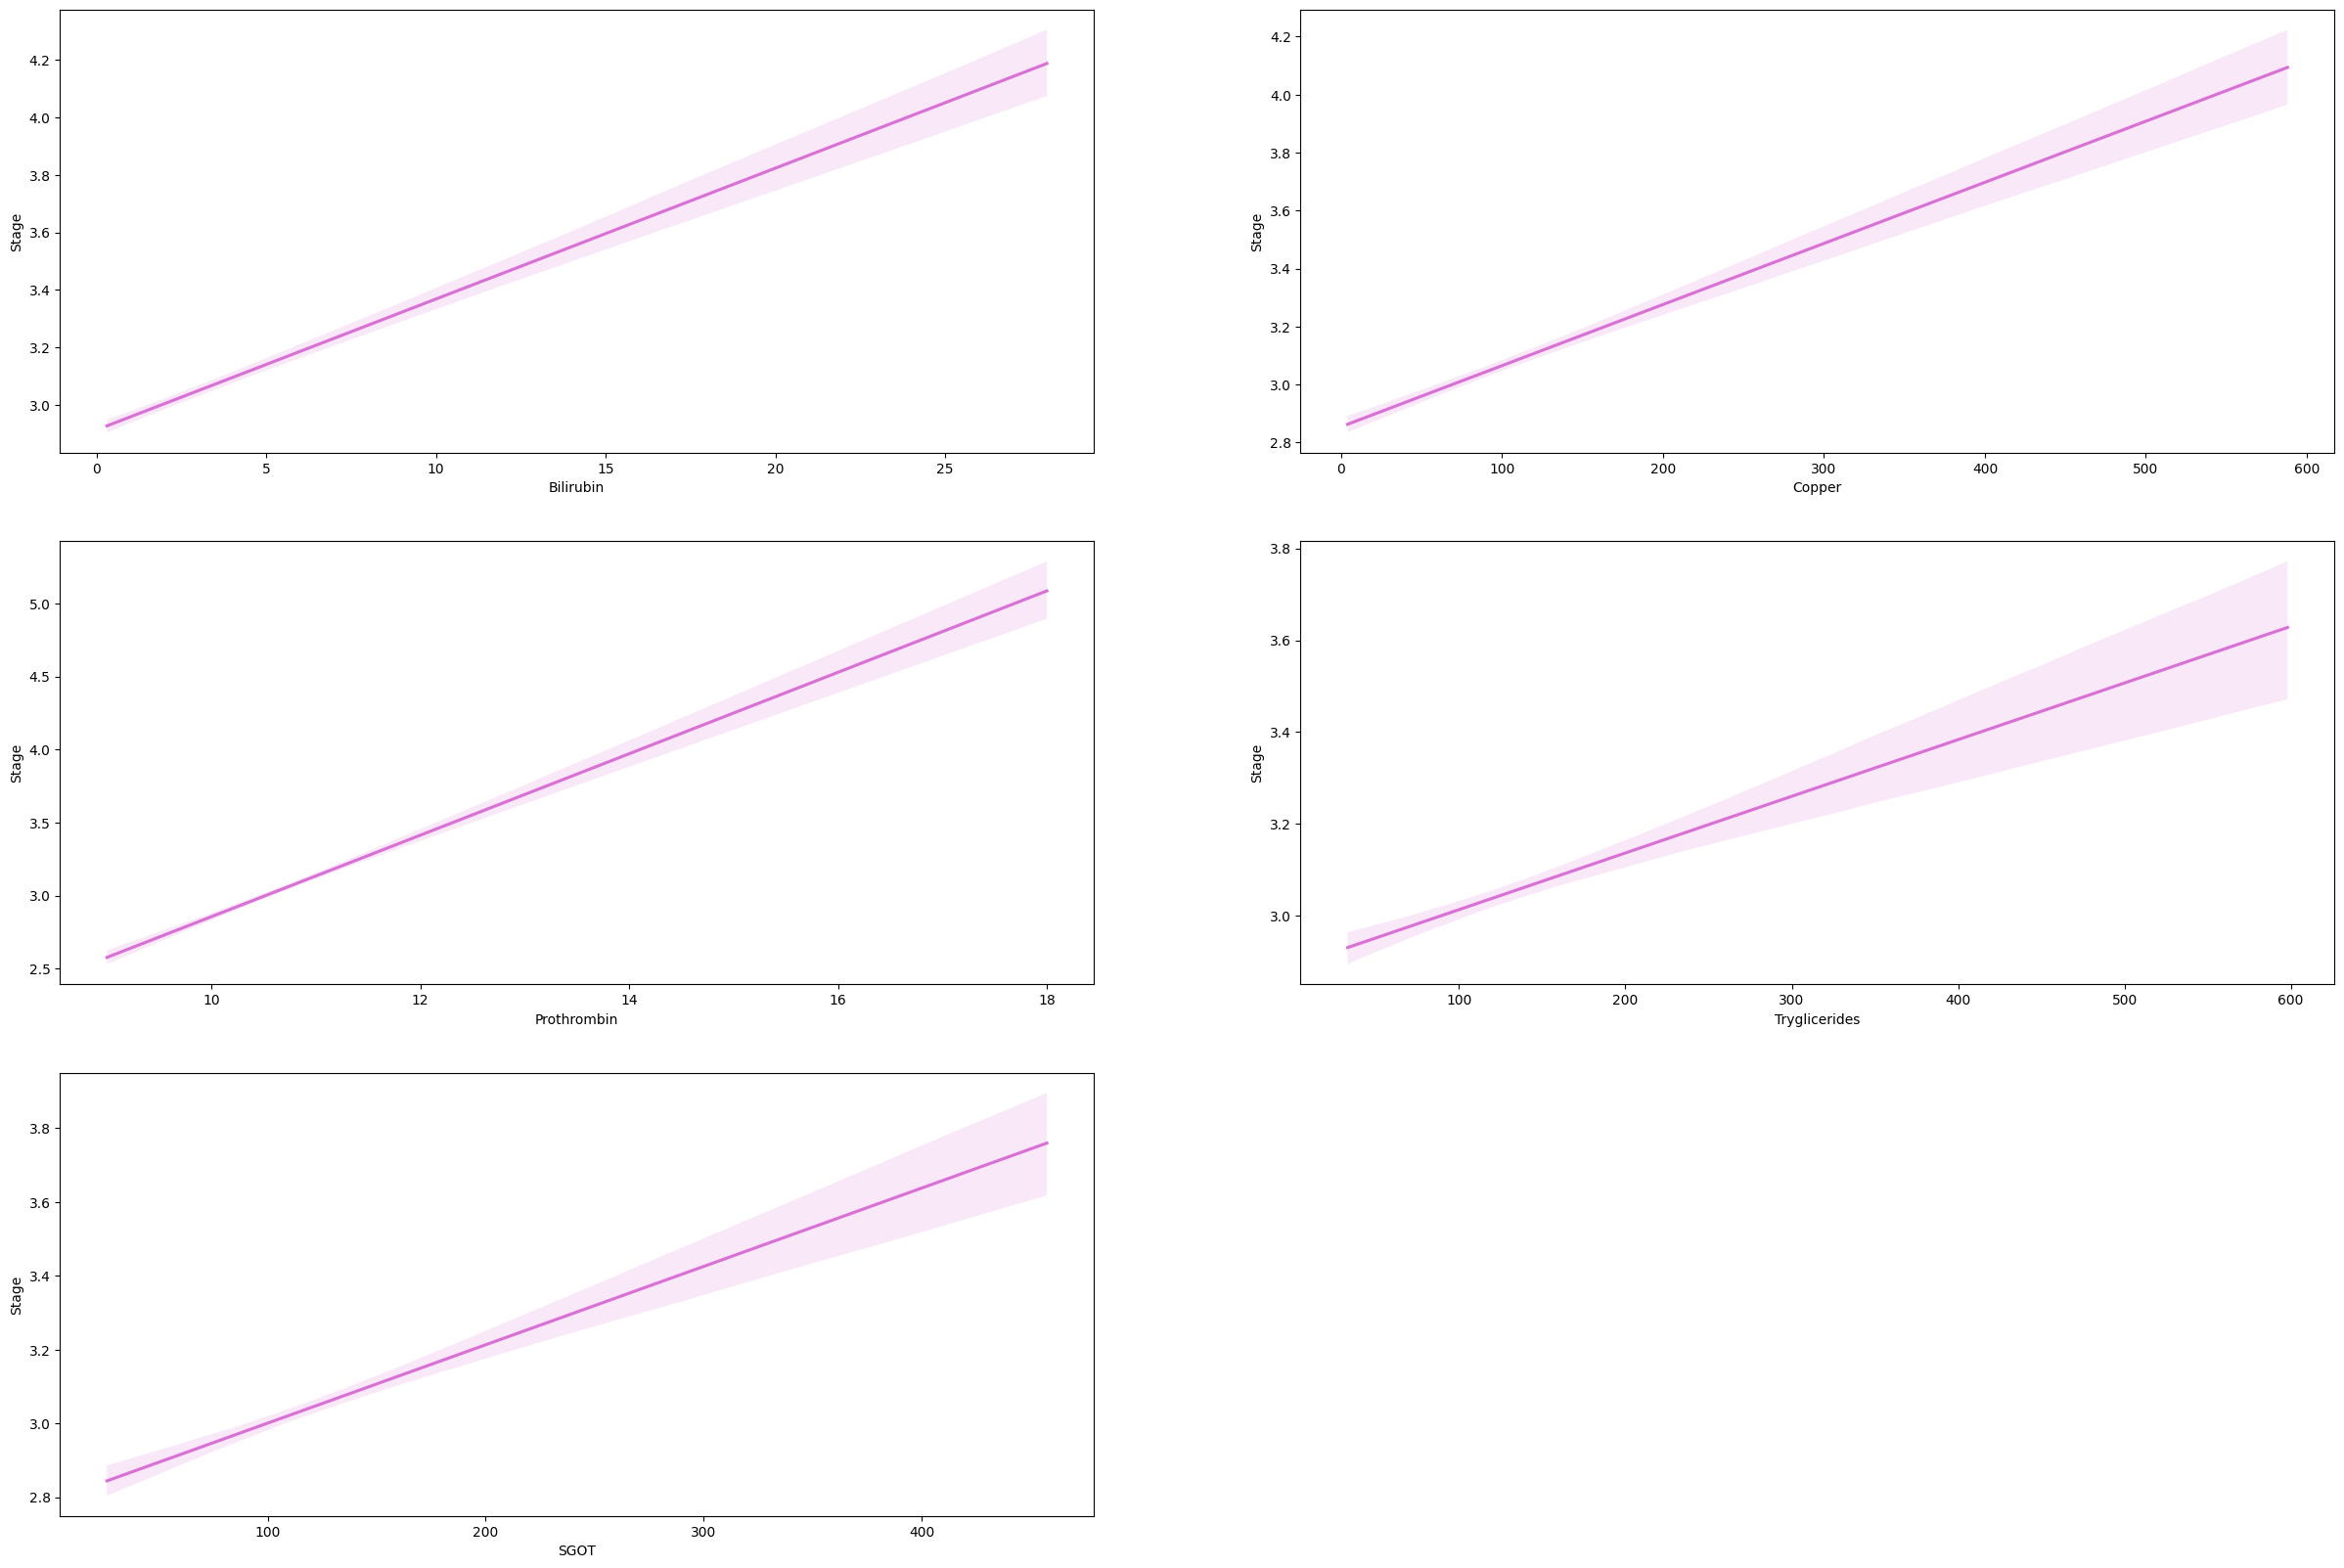

In [19]:
plt.figure(figsize = (30,20))
loop = train_df[["Bilirubin","Copper",'Prothrombin',"Tryglicerides","SGOT"]]
i = 0
for c in loop:
    i +=1
    plt.subplot(3,2,i)
    sns.regplot(x = train_df[c],y = train_df["Stage"],scatter=False, color='orchid',)
plt.show()

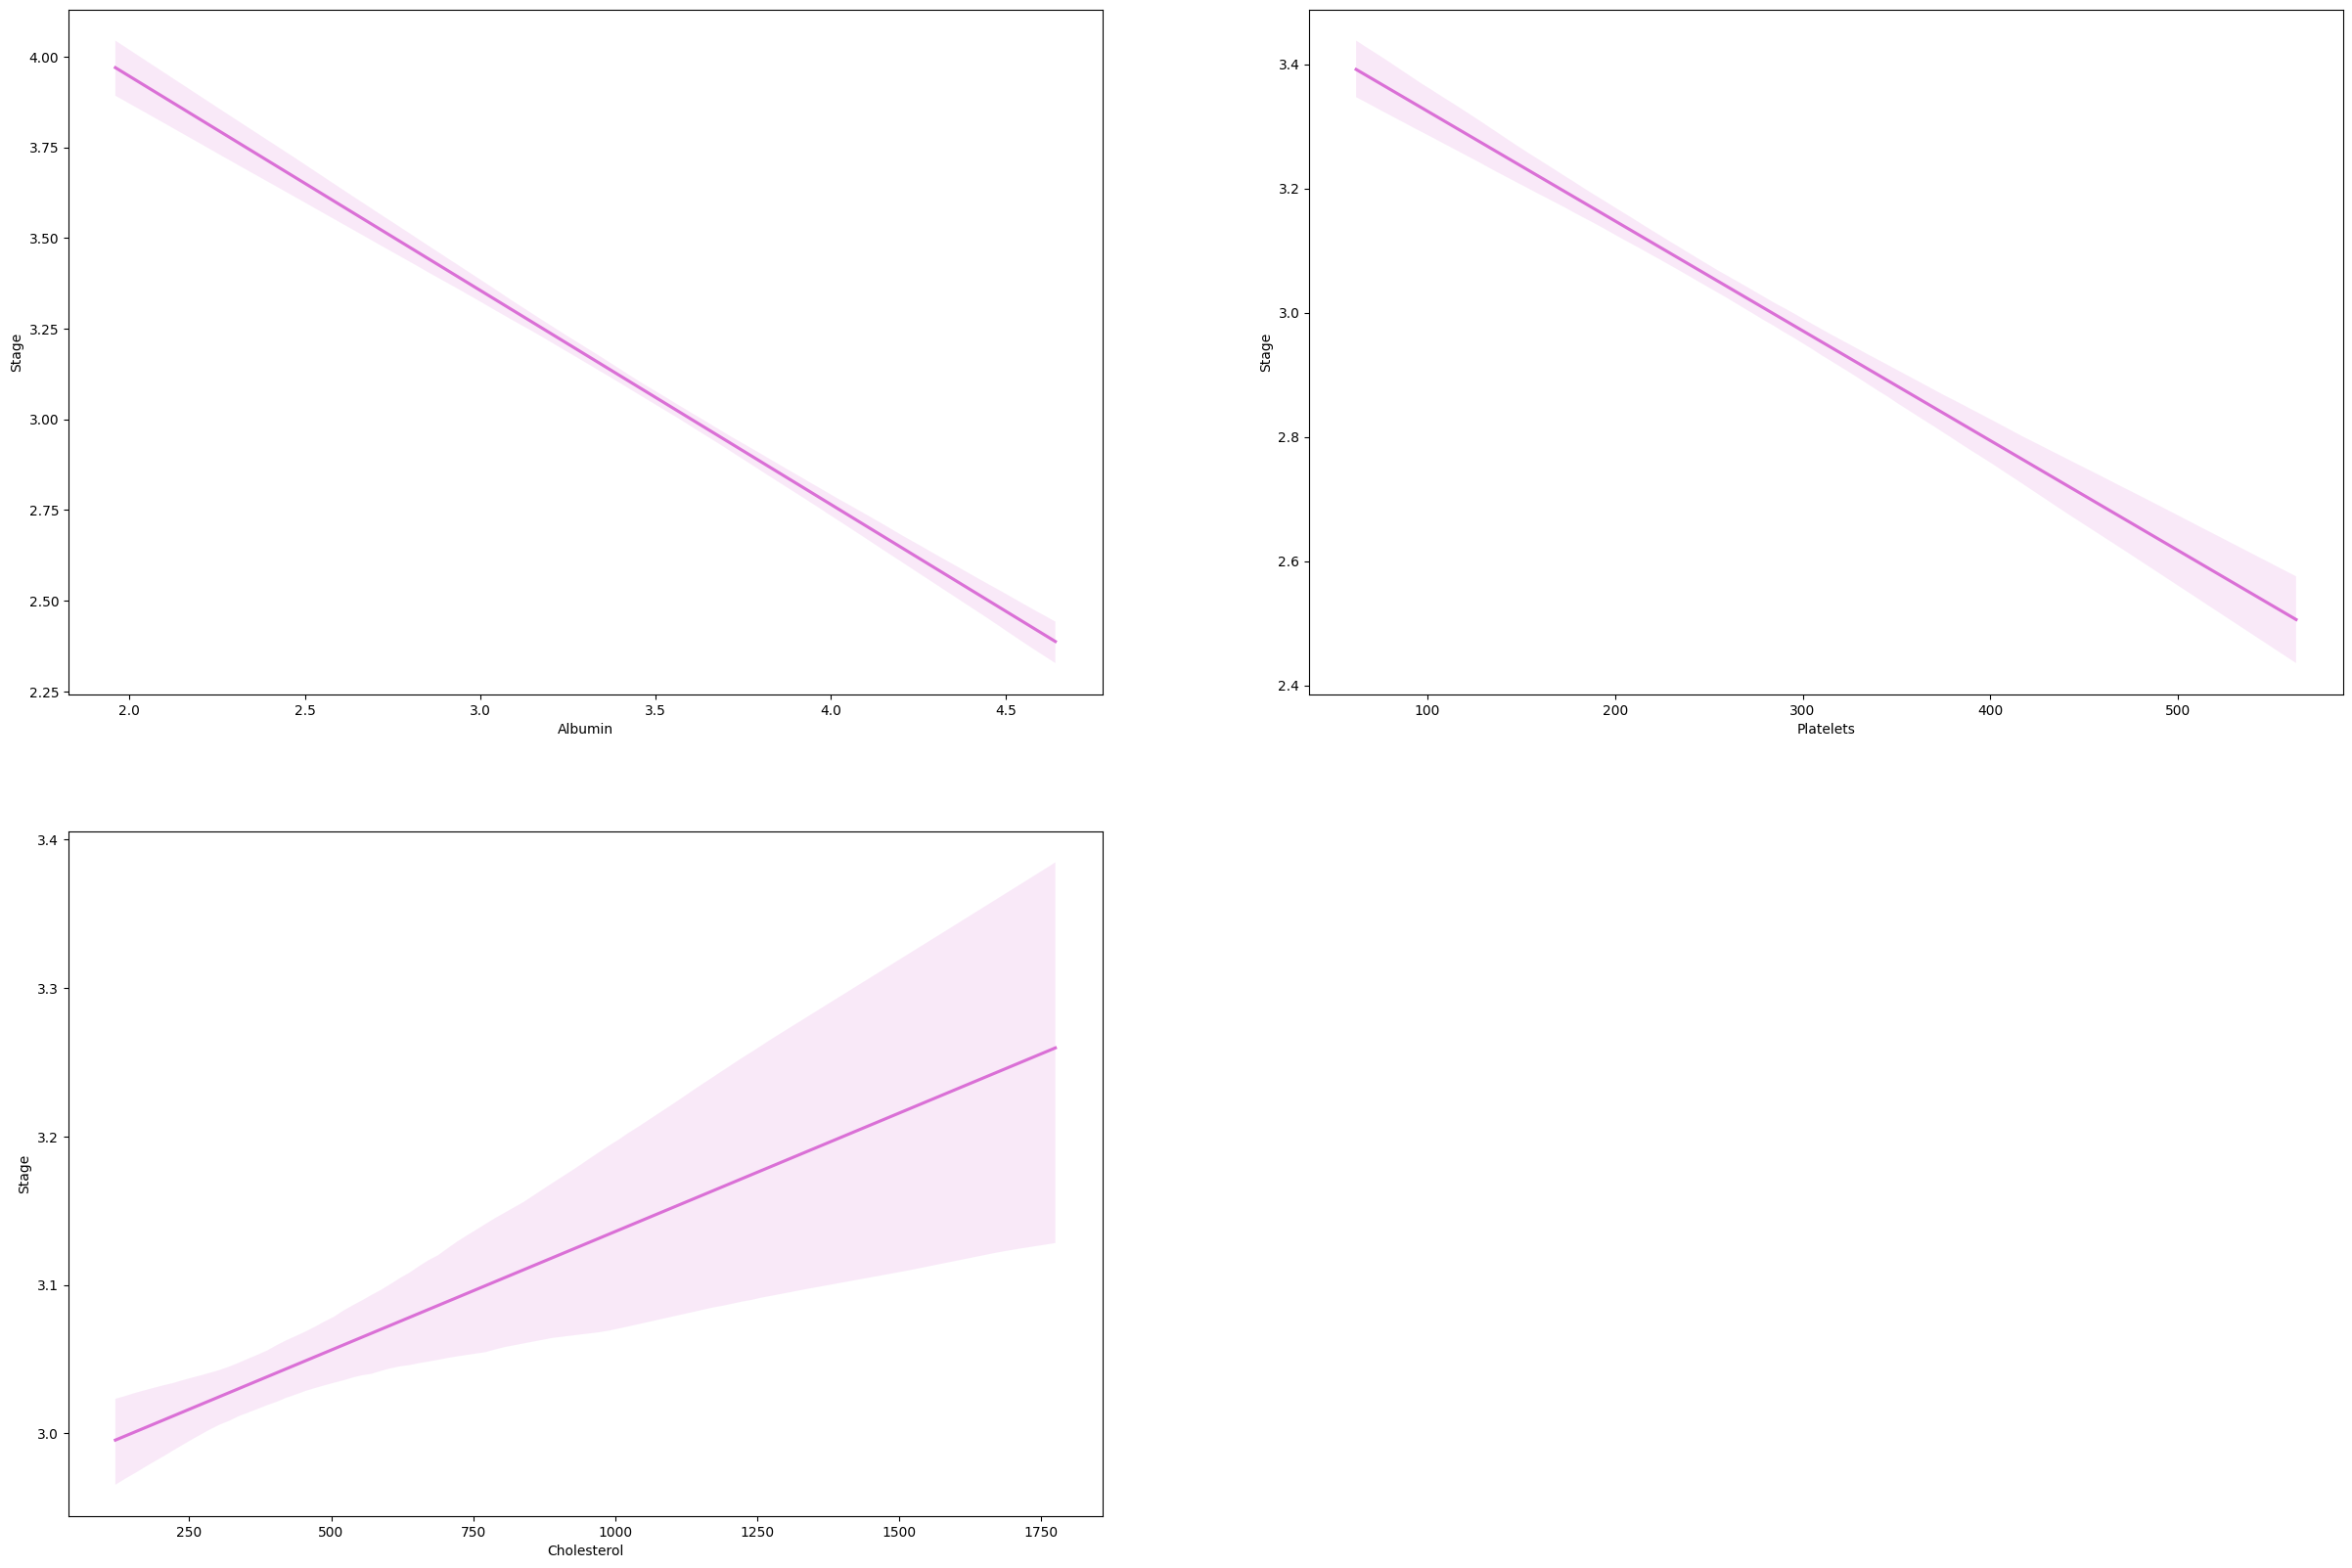

In [20]:
data=train_df
plt.figure(figsize = (30,20))
loop = data[["Albumin","Platelets","Cholesterol"]]
i = 0
for c in loop:

    i +=1
    plt.subplot(2,2,i)
    sns.regplot(x = data[c],y = data["Stage"],scatter=False, color='orchid')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42, stratify = y)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [22]:
num_features = X.select_dtypes(include='number').columns.tolist()
print(f'Numerical Features  : {num_features}')

Numerical Features  : ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


In [23]:
cat_features = X.select_dtypes(include = 'object').columns.tolist()
print(f'Categorical Features: {cat_features}')

Categorical Features: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [24]:
num_pipeline = Pipeline(
steps = [
    ('imputer',IterativeImputer(max_iter=10, random_state=0)), 
    ('scaler',StandardScaler())
]
)
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehotencoder',OneHotEncoder()) 
    ]
)
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
])
print(preprocessor)

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', StandardScaler())]),
                                 ['N_Days', 'Age', 'Bilirubin', 'Cholesterol',
                                  'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
                                  'Tryglicerides', 'Platelets', 'Prothrombin',
                                  'Stage']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Drug', 'Sex', 'Ascites', 'Hepatomegaly',
                               

In [25]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
oversample=SMOTE()
X_train_balanced,y_train_balanced=oversample.fit_resample(X_train,y_train)

In [26]:
models = {
    'Random Forest' : RandomForestClassifier(),
    'Logistic regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN Classifier':KNeighborsClassifier(),
    'Support vector classifier': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'XGboost': xb.XGBClassifier(),
    'LGBMClassifier':LGBMClassifier()
}

In [27]:
def evaluate_model(X_train, y_train, X_test, y_test, models):
    report = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        modelpred = model.predict(X_test)
        modelacc = accuracy_score(y_test,modelpred)
        if hasattr(model, 'predict_proba'):
            modellogloss = log_loss(y_test, model.predict_proba(X_test))
            print(f"Model: {model_name}")
            print(f"Accuracy: {modelacc:.4f}")
            print(f"Log Loss: {modellogloss:.4f}")
            print("----------------------")   
        else:
            print(f"Model: {model_name}")
            print(f"Accuracy: {modelacc:.4f}")
            print("Log Loss: Not applicable for this model")
            print("----------------------")
    return report

In [28]:
CatModel = CatBoostClassifier()
CatModel.fit(X_train_balanced, y_train_balanced, verbose=256)
catpred= CatModel.predict(X_test)
catprob= CatModel.predict_proba(X_test)

Learning rate set to 0.089937
0:	learn: 1.0437822	total: 166ms	remaining: 2m 45s
256:	learn: 0.3091942	total: 4.36s	remaining: 12.6s
512:	learn: 0.2135851	total: 8.55s	remaining: 8.12s
768:	learn: 0.1615241	total: 12.8s	remaining: 3.83s
999:	learn: 0.1315447	total: 16.7s	remaining: 0us


In [29]:
best_catboost_params ={'iterations': 1088,
                       'learning_rate': 0.17925593185968117,
                       'l2_leaf_reg': 99.16431432391344,
                       'bagging_temperature': 0.6263803002070255,
                       'random_strength': 1.8069902636963184,
                       'depth': 7,
                       'min_data_in_leaf': 95
                       }

In [30]:
best_catboost_model = CatBoostClassifier(**best_catboost_params)
best_catboost_model.fit(X_train_balanced, y_train_balanced,verbose=256)
optcatprob= best_catboost_model.predict_proba(X_test)
optcatpred=best_catboost_model.predict(X_test)

0:	learn: 1.0346538	total: 36.6ms	remaining: 39.8s
256:	learn: 0.3626375	total: 7.23s	remaining: 23.4s
512:	learn: 0.2824592	total: 14.3s	remaining: 16s
768:	learn: 0.2336708	total: 21.2s	remaining: 8.78s
1024:	learn: 0.2003729	total: 28.1s	remaining: 1.72s
1087:	learn: 0.1924310	total: 29.8s	remaining: 0us


In [31]:
params2 = {'num_leaves': 97,
           'learning_rate': 0.1039855156369363,
           'feature_fraction': 0.1078671618924083,
           'bagging_fraction': 0.979877763699174,
           'bagging_freq': 1,
           'min_child_samples': 23,
           'reg_alpha': 3.790536920508604e-05,
           'reg_lambda': 0.09700310859112533}

In [32]:
lgbm_model = LGBMClassifier(**params2)
lgbm_model.fit(X_train_balanced, y_train_balanced)
lgbmpred=lgbm_model.predict(X_test)
lgbmprob = lgbm_model.predict_proba(X_test)
RANDOM_SEED = np.random.seed(42)

[LightGBM] [Warning] feature_fraction is set=0.1078671618924083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1078671618924083
[LightGBM] [Warning] bagging_fraction is set=0.979877763699174, subsample=1.0 will be ignored. Current value: bagging_fraction=0.979877763699174
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1078671618924083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1078671618924083
[LightGBM] [Warning] bagging_fraction is set=0.979877763699174, subsample=1.0 will be ignored. Current value: bagging_fraction=0.979877763699174
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

In [33]:
params3={'alpha': 7.168196916004604e-07,
         'max_depth': 10,
         'eta': 0.029066408503090033,
         'gamma': 0.2606483714374875,
         'colsample_bytree': 0.29151282907419457,
         'subsample': 0.9171972259358953,
         'min_child_weight': 6, 'n_estimators': 874,
         'learning_rate': 0.0738503565815631,
         'reg_alpha': 0.5767344418207503,
         'reg_lambda': 0.5772724799144292}

In [34]:
XGBModel_2 = xb.XGBClassifier(**params3, random_state=RANDOM_SEED)
XGBModel_2.fit(X_train_balanced, y_train_balanced)
xg2preds = XGBModel_2.predict(X_test)
xg2prob= XGBModel_2.predict_proba(X_test)

In [35]:
ensemble_model = VotingClassifier(
    estimators=[
        ('lgb', lgbm_model),
        ('xgb', XGBModel_2),
        ('cb',best_catboost_model)
    ],
    voting='soft'
)

In [36]:
scores = cross_val_score(ensemble_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
ensemble_model.fit(X_train_balanced, y_train_balanced)
predsi=ensemble_model.predict(X_test)
predictions = ensemble_model.predict_proba(X_test)
l1=log_loss(y_test,catprob)
l2= log_loss(y_test,optcatprob)
l3= log_loss(y_test,lgbmprob)
l4= log_loss(y_test,xg2prob)
l5= log_loss(y_test, predictions)
acc1=accuracy_score(y_test,catpred)
acc2=accuracy_score(y_test,optcatpred)
acc3=accuracy_score(y_test,lgbmpred)
acc4=accuracy_score(y_test,xg2preds)
acc5=accuracy_score(y_test,predsi)

[LightGBM] [Warning] feature_fraction is set=0.1078671618924083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1078671618924083
[LightGBM] [Warning] bagging_fraction is set=0.979877763699174, subsample=1.0 will be ignored. Current value: bagging_fraction=0.979877763699174
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.1078671618924083, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.1078671618924083
[LightGBM] [Warning] bagging_fraction is set=0.979877763699174, subsample=1.0 will be ignored. Current value: bagging_fraction=0.979877763699174
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

In [37]:
evaluate_model(X_train_balanced,y_train_balanced,X_test,y_test,models)

Model: Random Forest
Accuracy: 0.8145
Log Loss: 0.5384
----------------------
Model: Logistic regression
Accuracy: 0.6794
Log Loss: 0.8111
----------------------
Model: Decision Tree
Accuracy: 0.7226
Log Loss: 9.9760
----------------------
Model: KNN Classifier
Accuracy: 0.7086
Log Loss: 4.3995
----------------------
Model: Support vector classifier
Accuracy: 0.7664
Log Loss: Not applicable for this model
----------------------
Model: AdaBoost
Accuracy: 0.7311
Log Loss: 1.0669
----------------------
Model: GradientBoost
Accuracy: 0.7847
Log Loss: 0.5398
----------------------
Model: XGboost
Accuracy: 0.8200
Log Loss: 0.4961
----------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5796
[LightGBM] [Info] Number of data points in the train set: 12318, number of used featu

{}

In [38]:
print("Model: CatBoost")
print(f"Accuracy: ",acc1)
print(f"Log Loss :",l1)
print("----------------------")

Model: CatBoost
Accuracy:  0.8223844282238443
Log Loss : 0.4733410866709677
----------------------


In [39]:
print("Model: XGboostCatLightEnsemble") 
print("Accuracy: ",acc5)
print("Log Loss : ",l5)
print("----------------------")

Model: XGboostCatLightEnsemble
Accuracy:  0.8363746958637469
Log Loss :  0.4324895180182658
----------------------
